## Investigating Outflow Source Properties
For the thesis, I did not compare outflow properties with the protostellar properties compiled by the HOPS SED fitting. There is a treasure trove of possible comparisons here! First, I'll see what correlations other outflow studies have looked at. 

Takahashi+08
![](screenshots/takahashi08_fig12_13.png)

Davis+09
![](screenshots/davis09_fig16.png)

In [2]:
from astropy.io import ascii
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('paper')
outflow_physics = Table.read("physics_outflows.txt", format='csv')
hops = Table.read("../catalogs/hops.fits")

[1 2 1 0 0 0 0 0 2 2 0 1 0 2 0 2 0 2 2 2 0 0 0 1 1 2 2 0 1 1 1 2 2 0 0 1 0
 2 0 1]
[1 2 1 1 1 1 1 1 2 2 1 1 1 2 2 2 2 2 2 2 1 1 2 1 2 2 2 1 1 1 2 2 2 2 1 1 2
 2 2 1]
[1.  1.  1.  0.  0.  0.  0.  0.  1.  1.  0.  1.  0.  1.  0.  1.  0.  1.
 1.  1.  0.  0.  0.  1.  0.5 1.  1.  0.  1.  1.  0.5 1.  1.  0.  0.  1.
 0.  1.  0.  1. ]
40 40


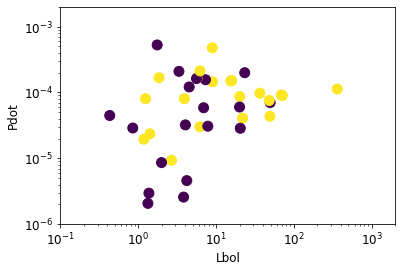

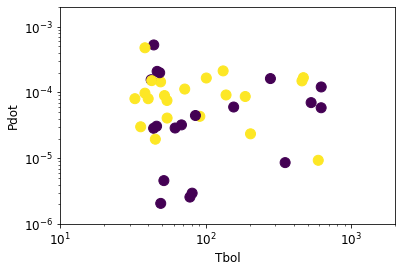

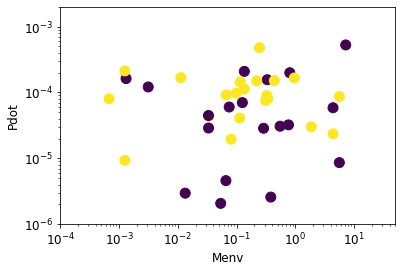

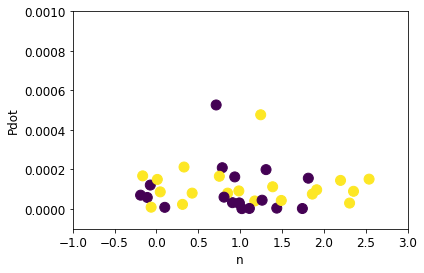

['   0' '   0' '   0' '   0' '   0' '   0' 'flat' 'flat' '   0' '   I'
 'flat' '   I' '   0' '   0' '   0' '   I' '   0' '   0' 'flat' '   0'
 '   0' '   I' 'flat' '   I' 'flat' '   0' '   0' 'flat' '   I' '   I'
 'flat' '   I' '   0' 'flat' '   0' '   0' '   0' '   I' '   I' '   0']


In [13]:
# Pdot_lowvel_summed = 
lookup = set()
unique_source = [x for x in outflow_physics['source'] if x not in lookup and lookup.add(x) is None and 'hops' in x]
Pdot_lowvel_summed = np.array([np.sum(outflow_physics['Pdot_lowvel'][outflow_physics['source'] == source])
                      for source in unique_source])
Pdot_hivel_summed = np.array([np.sum(outflow_physics['Pdot_hivel'][outflow_physics['source'] == source])
                      for source in unique_source])
Pdot_lowvel_mean = np.array([np.mean(outflow_physics['Pdot_lowvel'][outflow_physics['source'] == source])
                      for source in unique_source])
Pdot_hivel_mean = np.array([np.mean(outflow_physics['Pdot_hivel'][outflow_physics['source'] == source])
                      for source in unique_source])

Edot_lowvel_mean = np.array([np.mean(outflow_physics['Edot_lowvel'][outflow_physics['source'] == source])
                      for source in unique_source])
Edot_hivel_mean = np.array([np.mean(outflow_physics['Edot_hivel'][outflow_physics['source'] == source])
                      for source in unique_source])

P_lowvel_mean = np.array([np.mean(outflow_physics['P_lowvel'][outflow_physics['source'] == source])
                      for source in unique_source])
P_hivel_mean = np.array([np.mean(outflow_physics['P_hivel'][outflow_physics['source'] == source])
                      for source in unique_source])
E_lowvel_mean = np.array([np.mean(outflow_physics['E_lowvel'][outflow_physics['source'] == source])
                      for source in unique_source])
E_hivel_mean = np.array([np.mean(outflow_physics['E_hivel'][outflow_physics['source'] == source])
                      for source in unique_source])

oa_mean = np.array([np.mean(outflow_physics['oa'][outflow_physics['source'] == source])
          for source in unique_source])

tdyn_mean = np.array([np.mean(outflow_physics['tdyn'][outflow_physics['source'] == source])
          for source in unique_source])

lobe_count = np.array([len(outflow_physics['lobe'][outflow_physics['source'] == source])
              for source in unique_source])
conf = np.array([len(np.where(outflow_physics['confidence'][outflow_physics['source'] == source] == 'D')[0])
                      for source in unique_source])
def_frac = np.array(conf)/np.array(lobe_count)

print(conf)
print(lobe_count)
print(def_frac)
print(len(Pdot_lowvel_summed), len(Pdot_hivel_summed))

hops_class = np.array([hops['Class'][hops['HOPS'] == int(source.split()[1])][0] for source in unique_source if 'hops' in source])
hops_Lbol = np.array([hops['Lbol'][hops['HOPS'] == int(source.split()[1])][0] for source in unique_source if 'hops' in source])
hops_Tbol = np.array([hops['Tbol'][hops['HOPS'] == int(source.split()[1])][0] for source in unique_source if 'hops' in source])
hops_Menv = np.array([hops['Menv'][hops['HOPS'] == int(source.split()[1])][0] for source in unique_source if 'hops' in source])
hops_n = np.array([hops['n'][hops['HOPS'] == int(source.split()[1])][0] for source in unique_source if 'hops' in source])


# pdot_hivel = [Pdot_hivel_summed
# print(len(hops_Menv))
# plt.scatter(hops_Lbol, np.array(Pdot_lowvel_summed)+np.array(Pdot_hivel_summed), c=lobe_count, marker='*')

ii_0 = np.where(def_frac == 0.)
plt.scatter(hops_Lbol, np.array(Pdot_lowvel_mean)+np.array(Pdot_hivel_mean), c=lobe_count)

# plt.colorbar()
plt.ylim(1e-6,2e-3)
plt.xlim(1e-1,2e3)
plt.xlabel("Lbol")
plt.ylabel("Pdot")
plt.loglog()
plt.show()

# plt.scatter(hops_Tbol, np.array(Pdot_lowvel_summed)+np.array(Pdot_hivel_summed), c=lobe_count, marker='*')
plt.scatter(hops_Tbol, np.array(Pdot_lowvel_mean)+np.array(Pdot_hivel_mean), c=lobe_count)
plt.ylim(1e-6,2e-3)
plt.xlim(1e1,2e3)
plt.xlabel("Tbol")
plt.ylabel("Pdot")
plt.loglog()
plt.show()

# plt.scatter(hops_Menv, np.array(Pdot_lowvel_summed)+np.array(Pdot_hivel_summed), c=lobe_count, marker='*')
plt.scatter(hops_Menv, np.array(Pdot_lowvel_mean)+np.array(Pdot_hivel_mean), c=lobe_count)
plt.ylim(1e-6,2e-3)
plt.xlim(1e-4,5e1)
plt.xlabel("Menv")
plt.ylabel("Pdot")
plt.loglog()
plt.show()

# plt.scatter(hops_n, np.array(Pdot_lowvel_summed)+np.array(Pdot_hivel_summed), c=lobe_count, marker='*')
plt.scatter(hops_n, np.array(Pdot_lowvel_mean)+np.array(Pdot_hivel_mean), c=lobe_count)
plt.ylim(-0.0001,.001)
plt.xlim(-1,3)
plt.xlabel("n")
plt.ylabel("Pdot")
# plt.loglog()
plt.show()




# print(hops_Lbol, Pdot_lowvel_summed+Pdot_hivel_summed)


print(hops_class)
# # print(hops_class)
# plt.hist(Pdot_lowvel_summed, bins=10)
# plt.hist(Pdot_hivel_summed, bins=10)
# print(Pdot_lowvel_summed)
# print(Pdot_hivel_summed)
# print(unique_source)
# Pdot_hivel_summed = outflow_physics['Pdot_hivel']

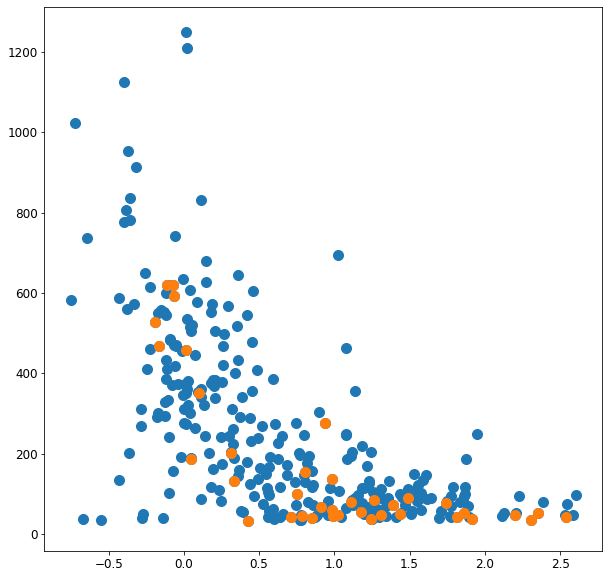

In [4]:
plt.figure(figsize=(10,10))
plt.scatter(hops['n'], hops['Tbol'])
plt.scatter(hops_n, hops_Tbol)

### Comparing Tbol Distribution in Outflow Sources with Full HOPS Sample

/Users/jesse/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jesse/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


Anderson_ksampResult(statistic=4.931559133985802, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.0036709069229862216)
Ks_2sampResult(statistic=0.28787878787878785, pvalue=0.004097906235015841)


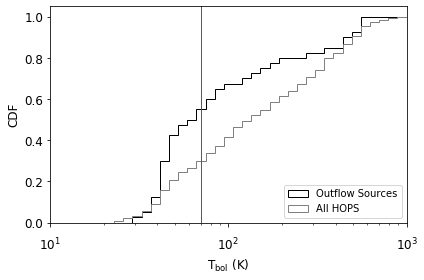

In [5]:
fig, ax = plt.subplots()

ax.hist(hops_Tbol, normed=True, cumulative=True, histtype='step', bins=np.logspace(1,3,40), label='Outflow Sources', color='black')
ax.hist(hops['Tbol'], normed=True, cumulative=True, histtype='step', bins=np.logspace(1,3,40), label='All HOPS', color='gray')


ax.set_xlim(10,1000)
plt.semilogx()
ax.axvline(70, color='tab:red', lw=1)
ax.set_xlabel(r"T$_{\rm bol}$ (K)")
ax.set_ylabel("CDF")
ax.legend(loc='lower right')
from scipy import stats
print(stats.anderson_ksamp([hops_Tbol, hops['Tbol']]))
print(stats.ks_2samp(hops_Tbol, hops['Tbol']))
ax.tick_params(axis='x', which='major', pad=10)
ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
fig.tight_layout()
plt.savefig("Tbol_dist.pdf", bbox_inches='tight')

### Outflow Properties vs. HOPS Tbol and Lbol

[ True  True  True False False False False False  True  True False  True
 False  True False  True False  True  True  True False False False  True
 False  True  True False  True  True False  True  True False False  True
 False  True False  True]


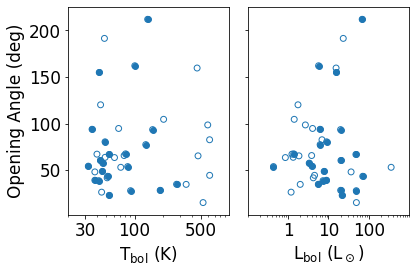

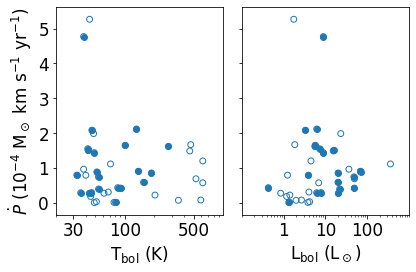

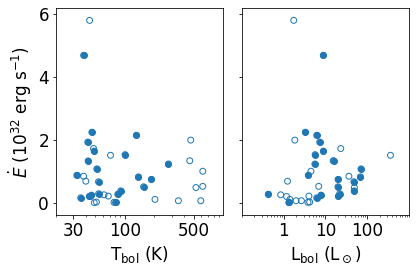

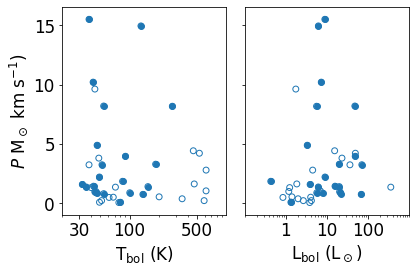

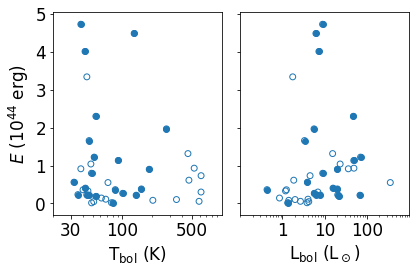

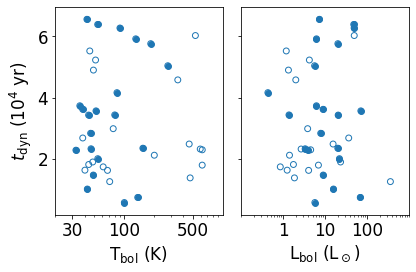

In [43]:
matplotlib.style.use('paper')


fig, [ax1,ax2] = plt.subplots(1,2, sharey=True)
print(def_frac >= 1)
ii_def = def_frac >= 1
sc = ax1.scatter(hops_Tbol, oa_mean, s=35, facecolors='none', edgecolors='tab:blue')
sc = ax1.scatter(hops_Tbol[ii_def], oa_mean[ii_def], s=35)
ax1.set_ylabel("Opening Angle (deg)")
ax1.set_xlabel(r"T$_{\rm bol}$ (K)")
ax1.semilogx()

ax1.set_xlim([20,1000])
ax1.set_xticks([30.,100.,500.])
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax2.scatter(hops_Lbol, oa_mean, s=35, facecolors='none', edgecolors='tab:blue')
ax2.scatter(hops_Lbol[ii_def], oa_mean[ii_def], s=35)
ax2.semilogx()

ax2.set_xlim([0.1,1000])
locmaj = matplotlib.ticker.LogLocator(base=10,numticks=12) 
ax2.xaxis.set_major_locator(locmaj)
locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9),numticks=12)
ax2.xaxis.set_minor_locator(locmin)
ax2.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax2.set_xticks([1,10,100])
ax2.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

fig.tight_layout()
# fig.subplots_adjust(wspace=0)
ax2.set_xlabel(r"L$_{\rm bol}$ (L$_\odot$)")
plt.savefig("Tbol_Lbol_oa.pdf", bbox_inches='tight')

pdot_scale = 1e-4
fig, [ax1,ax2] = plt.subplots(1,2, sharey=True)
sc = ax1.scatter(hops_Tbol, (np.array(Pdot_lowvel_mean)+np.array(Pdot_hivel_mean))/pdot_scale, s=35,
                facecolors='none', edgecolors='tab:blue')
sc = ax1.scatter(hops_Tbol[ii_def], (np.array(Pdot_lowvel_mean)+np.array(Pdot_hivel_mean))[ii_def]/pdot_scale, s=35)

ax1.set_ylabel(r"$\dotP$ (10$^{{{}}}$ M$_\odot$ km s$^{{-1}}$ yr$^{{-1}}$)".format(int(np.log10(pdot_scale))))
ax1.set_xlabel(r"T$_{\rm bol}$ (K)")
# ax1.set_ylim(-1e-5,1e-3)
ax1.semilogx()
ax1.set_xlim([20,1000])
ax1.set_xticks([30.,100.,500.])
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax2.scatter(hops_Lbol, (np.array(Pdot_lowvel_mean)+np.array(Pdot_hivel_mean))/pdot_scale, s=35,
           facecolors='none', edgecolors='tab:blue')
ax2.scatter(hops_Lbol[ii_def], (np.array(Pdot_lowvel_mean)+np.array(Pdot_hivel_mean))[ii_def]/pdot_scale, s=35)
ax2.semilogx()

ax2.set_xlim([0.1,1000])
locmaj = matplotlib.ticker.LogLocator(base=10,numticks=12) 
ax2.xaxis.set_major_locator(locmaj)
locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9),numticks=12)
ax2.xaxis.set_minor_locator(locmin)
ax2.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax2.set_xticks([1,10,100])
ax2.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())



fig.tight_layout()
# fig.subplots_adjust(wspace=0)
ax2.set_xlabel(r"L$_{\rm bol}$ (L$_\odot$)")
plt.savefig("Tbol_Lbol_Pdot.pdf", bbox_inches='tight')

edot_scale = 1e32
fig, [ax1,ax2] = plt.subplots(1,2, sharey=True)
sc = ax1.scatter(hops_Tbol, (np.array(Edot_lowvel_mean)+np.array(Edot_hivel_mean))/edot_scale, s=35,
                facecolors='none', edgecolors='tab:blue')
sc = ax1.scatter(hops_Tbol[ii_def], (np.array(Edot_lowvel_mean)+np.array(Edot_hivel_mean))[ii_def]/edot_scale, s=35)
ax1.set_ylabel(r"$\dotE$ (10$^{{{}}}$ erg s$^{{-1}}$)".format(int(np.log10(edot_scale))))
ax1.set_xlabel(r"T$_{\rm bol}$ (K)")
# ax1.set_ylim(-1e-5,1e-3)
ax1.semilogx()
ax1.set_xlim([20,1000])
ax1.set_xticks([30.,100.,500.])
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax2.scatter(hops_Lbol, (np.array(Edot_lowvel_mean)+np.array(Edot_hivel_mean))/edot_scale, s=35,
           facecolors='none', edgecolors='tab:blue')
ax2.scatter(hops_Lbol[ii_def], (np.array(Edot_lowvel_mean)+np.array(Edot_hivel_mean))[ii_def]/edot_scale, s=35)
ax2.semilogx()

ax2.set_xlim([0.1,1000])
locmaj = matplotlib.ticker.LogLocator(base=10,numticks=12) 
ax2.xaxis.set_major_locator(locmaj)
locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9),numticks=12)
ax2.xaxis.set_minor_locator(locmin)
ax2.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax2.set_xticks([1,10,100])
ax2.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

fig.tight_layout()
# fig.subplots_adjust(wspace=0)
ax2.set_xlabel(r"L$_{\rm bol}$ (L$_\odot$)")
plt.savefig("Tbol_Lbol_Edot.pdf", bbox_inches='tight')

p_scale = 1
fig, [ax1,ax2] = plt.subplots(1,2, sharey=True)
sc = ax1.scatter(hops_Tbol, (np.array(P_lowvel_mean)+np.array(P_hivel_mean))/p_scale, s=35,
                facecolors='none', edgecolors='tab:blue')
sc = ax1.scatter(hops_Tbol[ii_def], (np.array(P_lowvel_mean)+np.array(P_hivel_mean))[ii_def]/p_scale, s=35)
ax1.set_ylabel(r"$P$ M$_\odot$ km s$^{{-1}}$)")
ax1.set_xlabel(r"T$_{\rm bol}$ (K)")
# ax1.set_ylim(-1e-5,1e-3)
ax1.semilogx()
ax1.set_xlim([20,1000])
ax1.set_xticks([30.,100.,500.])
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax2.scatter(hops_Lbol, (np.array(P_lowvel_mean)+np.array(P_hivel_mean))/p_scale, s=35,
           facecolors='none', edgecolors='tab:blue')
ax2.scatter(hops_Lbol[ii_def], (np.array(P_lowvel_mean)+np.array(P_hivel_mean))[ii_def]/p_scale, s=35)
ax2.semilogx()

ax2.set_xlim([0.1,1000])
locmaj = matplotlib.ticker.LogLocator(base=10,numticks=12) 
ax2.xaxis.set_major_locator(locmaj)
locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9),numticks=12)
ax2.xaxis.set_minor_locator(locmin)
ax2.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax2.set_xticks([1,10,100])
ax2.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

fig.tight_layout()
# fig.subplots_adjust(wspace=0)
ax2.set_xlabel(r"L$_{\rm bol}$ (L$_\odot$)")
plt.savefig("Tbol_Lbol_P.pdf", bbox_inches='tight')

E_scale = 1e44
fig, [ax1,ax2] = plt.subplots(1,2, sharey=True)
sc = ax1.scatter(hops_Tbol, (np.array(E_lowvel_mean)+np.array(E_hivel_mean))/E_scale, s=35,
                facecolors='none', edgecolors='tab:blue')
sc = ax1.scatter(hops_Tbol[ii_def], (np.array(E_lowvel_mean)+np.array(E_hivel_mean))[ii_def]/E_scale, s=35)
ax1.set_ylabel(r"$E$ (10$^{{{}}}$ erg)".format(int(np.log10(E_scale))))
ax1.set_xlabel(r"T$_{\rm bol}$ (K)")
# ax1.set_ylim(-1e-5,1e-3)
ax1.semilogx()
ax1.set_xlim([20,1000])
ax1.set_xticks([30.,100.,500.])
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax2.scatter(hops_Lbol, (np.array(E_lowvel_mean)+np.array(E_hivel_mean))/E_scale, s=35,
           facecolors='none', edgecolors='tab:blue')
ax2.scatter(hops_Lbol[ii_def], (np.array(E_lowvel_mean)+np.array(E_hivel_mean))[ii_def]/E_scale, s=35)
ax2.semilogx()

ax2.set_xlim([0.1,1000])
locmaj = matplotlib.ticker.LogLocator(base=10,numticks=12) 
ax2.xaxis.set_major_locator(locmaj)
locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9),numticks=12)
ax2.xaxis.set_minor_locator(locmin)
ax2.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax2.set_xticks([1,10,100])
ax2.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

fig.tight_layout()
# fig.subplots_adjust(wspace=0)
ax2.set_xlabel(r"L$_{\rm bol}$ (L$_\odot$)")
plt.savefig("Tbol_Lbol_E.pdf", bbox_inches='tight')

tdyn_scale = 1e4
fig, [ax1,ax2] = plt.subplots(1,2, sharey=True)
sc = ax1.scatter(hops_Tbol, np.array(tdyn_mean)/tdyn_scale, s=35,
                facecolors='none', edgecolors='tab:blue')
sc = ax1.scatter(hops_Tbol[ii_def], np.array(tdyn_mean)[ii_def]/tdyn_scale, s=35)
ax1.set_ylabel(r"$t_{{\rm dyn}}$ (10$^{{{}}}$ yr)".format(int(np.log10(tdyn_scale))))
ax1.set_xlabel(r"T$_{\rm bol}$ (K)")
# ax1.set_ylim(-1e-5,1e-3)
# ax1.ticklabel_format(axis='both', style='sci')
ax1.semilogx()
ax1.set_xlim([20,1000])
ax1.set_xticks([30.,100.,500.])
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax2.scatter(hops_Lbol, np.array(tdyn_mean)/tdyn_scale, s=35,
           facecolors='none', edgecolors='tab:blue')
ax2.scatter(hops_Lbol[ii_def], np.array(tdyn_mean)[ii_def]/tdyn_scale, s=35)
ax2.semilogx()

ax2.set_xlim([0.1,1000])
locmaj = matplotlib.ticker.LogLocator(base=10,numticks=12) 
ax2.xaxis.set_major_locator(locmaj)
locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9),numticks=12)
ax2.xaxis.set_minor_locator(locmin)
ax2.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax2.set_xticks([1,10,100])
ax2.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

fig.tight_layout()
# fig.subplots_adjust(wspace=0)
ax2.set_xlabel(r"L$_{\rm bol}$ (L$_\odot$)")
plt.savefig("Tbol_Lbol_tdyn.pdf", bbox_inches='tight')

### Filament-Outflow Alignment in low- and high-Tbol sources
See filaments.py for the code to make these figures.

### Correlation between $L_{\rm bol}$ and $T_{\rm bol}$?

[]

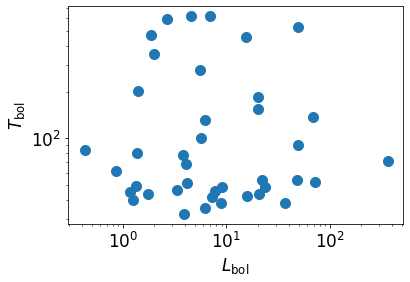

In [48]:
plt.scatter(hops_Lbol, hops_Tbol)
plt.xlabel(r"$L_{\rm bol}$")
plt.ylabel(r"$T_{\rm bol}$")
plt.loglog()

# Nope.

In [1]:
from astropy.coordinates import SkyCoord
SkyCoord.from_name("hops 68")

<SkyCoord (ICRS): (ra, dec) in deg
    (83.85124958, -5.14185722)>